In [1]:
import pandas as pd

# load data
km_woba = pd.read_csv('marte_xwoba_type_19-22.csv')
km_woba = km_woba.melt('pitch_type')  # melt the data to simplify catplot experience
km_woba

,pitch_type,variable,value
0,4-Seamer,xwOBA,0.316
1,Slider,xwOBA,0.283
2,Changeup,xwOBA,0.310
3,Sinker,xwOBA,0.398
4,Curveball,xwOBA,0.291
5,Cutter,xwOBA,0.298
6,Splitter,xwOBA,0.195
7,4-Seamer,vs_div,0.306
8,Slider,vs_div,0.245
9,Changeup,vs_div,0.301


## Perform Ketel Marte baseline xwOBA graphical analysis

/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


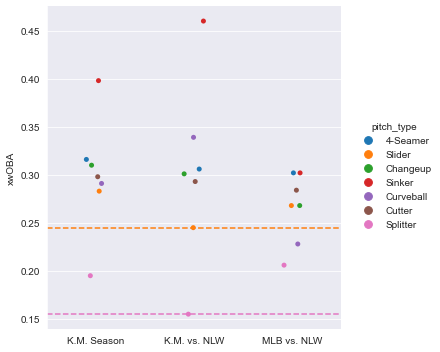

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(x='variable', y='value', hue='pitch_type', data=km_woba)
g.set_axis_labels("", "xwOBA")
g.set_xticklabels(["K.M. Season", "K.M. vs. NLW", "MLB vs. NLW"])

# set a refline at KM's Div xwOBA vs. NLW against fastball; first color
g.refline(y=0.245, color=sns.color_palette()[1])
# set a refline at KM's Div xwOBA vs. NLW against curveball; fifth color
# g.refline(y=0.203, color=sns.color_palette()[4])
# set a refline at KM's Div xwOBA vs. NLW against splitter; seventh color
g.refline(y=0.155, color=sns.color_palette()[6])
plt.show()

## Load training data from the 2021 season and perform Data Understanding and graphical analysis

In [3]:
km = pd.read_csv('marte_vs_nlwest_19_22.csv').rename(columns={'estimated_woba_using_speedangle': 'xwOBA'})
y = pd.DataFrame(km['xwOBA'])
# y.rename(columns={'estimated_woba_using_speedangle': 'xwOBA'}, inplace=True)
y.fillna(0, inplace=True)  # remove NaN values with 0
print(y.describe())

            xwOBA
count  867.000000
mean     0.286809
std      0.355253
min      0.000000
25%      0.005000
50%      0.141000
75%      0.457500
max      1.954000


In [5]:
# release_speed
# Pitch velocities from 2008-16 are via Pitch F/X, and adjusted to roughly out-of-hand release point. All velocities from 2017 and beyond are Statcast, which are reported out-of-hand.
# release_pos_x
# Horizontal Release Position of the ball measured in feet from the catcher's perspective.
# release_pos_z
# Vertical Release Position of the ball measured in feet from the catcher's perspective.
# plate_x
# Horizontal position of the ball when it crosses home plate from the catcher's perspective.
# plate_z
# Vertical position of the ball when it crosses home plate from the catcher's perspective.
# pitcher
# MLB Player Id tied to the play event.
# zone
# Zone location of the ball when it crosses the plate from the catcher's perspective.
# pfx_x
# Horizontal movement in feet from the catcher's perspective.
# pfx_z
# Vertical movement in feet from the catcher's perpsective.
# effective_speed
# Derived speed based on the the extension of the pitcher's release.
# release_spin
# Spin rate of pitch tracked by Statcast.
# spin_axis
# The Spin Axis in the 2D X-Z plane in degrees from 0 to 360, such that 180 represents a pure backspin fastball and 0 degrees represents a pure topspin (12-6) curveball
featureList = ['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z', 'plate_x', 'plate_z', 'pitcher', 'zone', 'p_throws', 'pfx_x', 'pfx_z', 'effective_speed', 'release_spin_rate', 'pitch_name', 'spin_axis']


X = pd.DataFrame(km[featureList])
# DataFrame casting appropriate features to category
X.pitcher = X.pitcher.astype('category')
X.zone = X.zone.astype('category')
X.describe()

,release_speed,release_pos_x,release_pos_z,plate_x,plate_z,pfx_x,pfx_z,effective_speed,release_spin_rate,spin_axis
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,861.000000,865.000000
mean,89.738870,-0.754821,5.877878,-0.041869,2.365398,-0.116459,0.700369,89.565167,2244.275261,179.675145
std,5.683886,1.982629,0.632229,0.577960,0.742914,0.817239,0.711186,5.822966,357.803834,66.079162
min,68.800000,-4.160000,1.150000,-1.890000,-0.070000,-1.810000,-1.650000,66.200000,873.000000,4.000000
25%,85.400000,-2.285000,5.640000,-0.420000,1.870000,-0.790000,0.270000,85.300000,2085.000000,138.000000
50%,91.200000,-1.550000,5.930000,-0.040000,2.340000,-0.180000,0.820000,90.900000,2286.000000,198.000000
75%,94.300000,1.540000,6.250000,0.355000,2.875000,0.505000,1.270000,94.100000,2480.000000,222.000000
max,101.500000,3.520000,7.060000,1.690000,5.070000,1.720000,1.870000,100.600000,3291.000000,357.000000


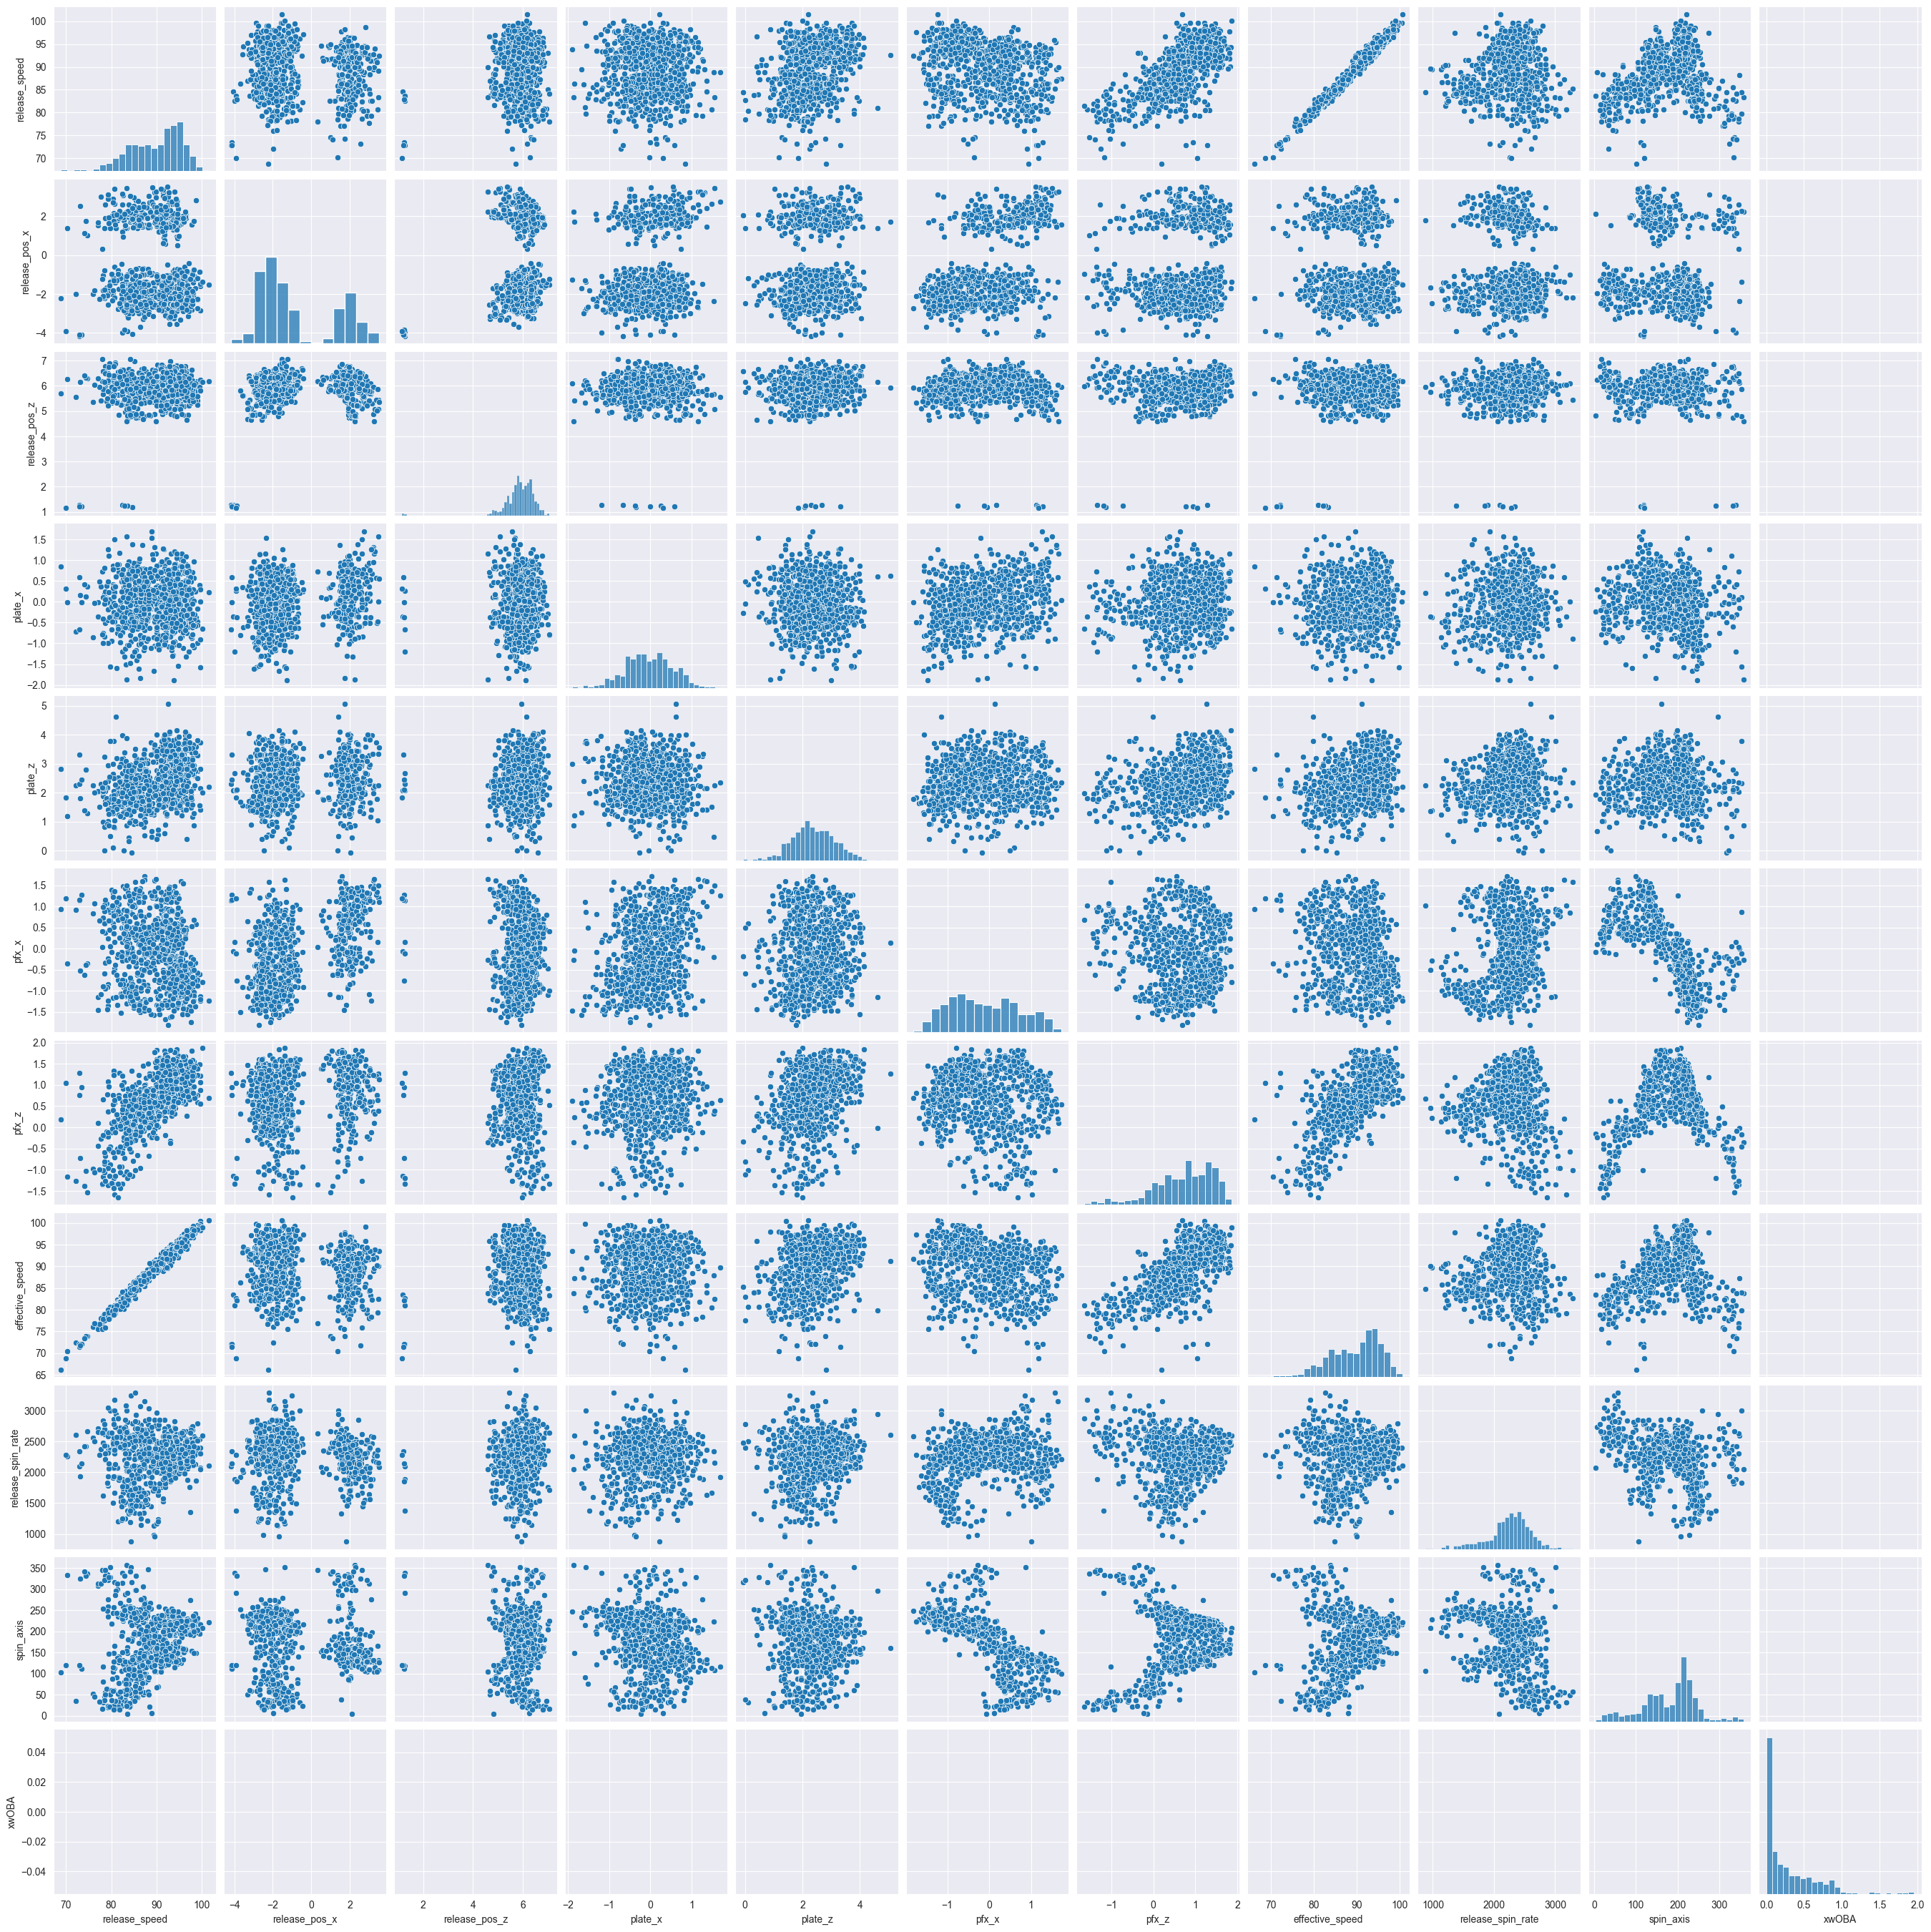

In [6]:
# create pairplot DataFrame
pp = pd.concat([X, y])
sns.pairplot(data=pp)
plt.show()

0      SI
1      SI
2      SI
3      SI
4      SI
       ..
862    SL
863    FF
864    FC
865    CH
866    FF
Name: pitch_type, Length: 867, dtype: object


/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


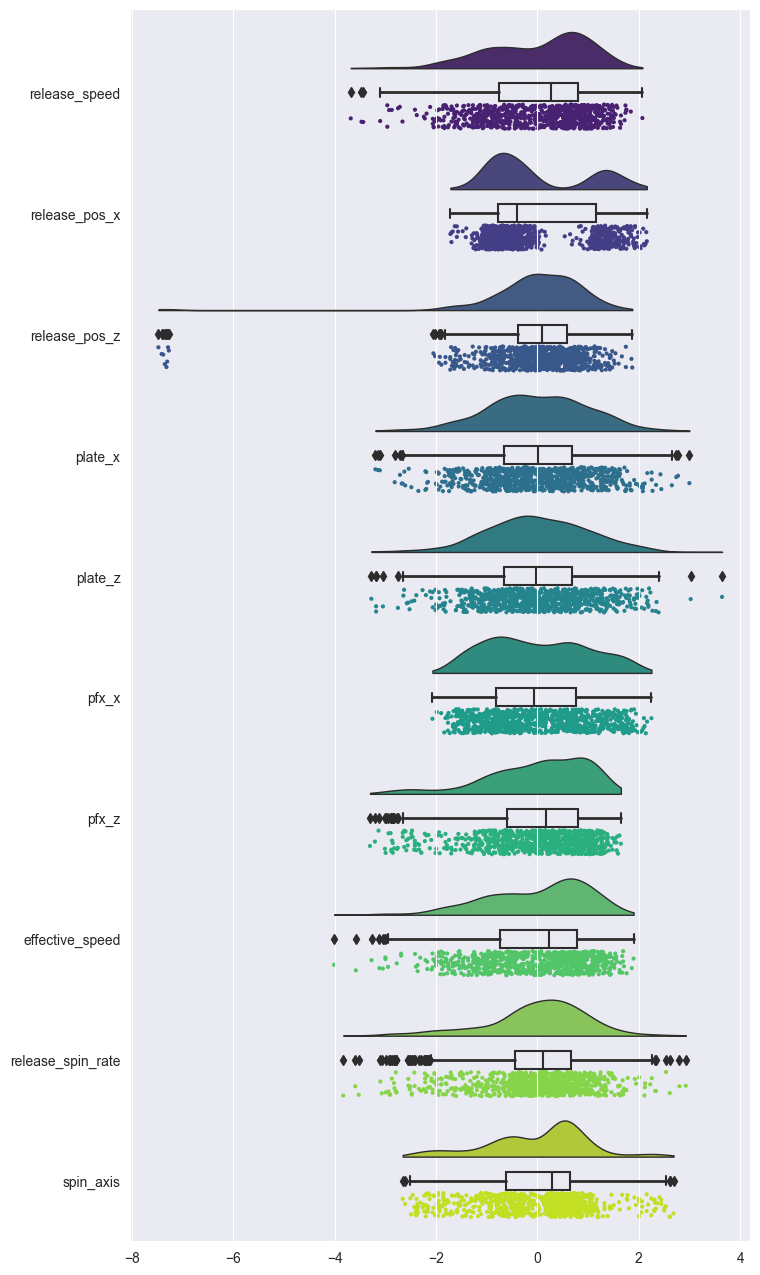

In [8]:
import ptitprince as pt

X_numeric = X.drop(columns=['pitch_type', 'pitcher', 'zone', 'p_throws', 'pitch_name'])

X_numeric = (X_numeric - X_numeric.mean()) / X_numeric.std()

print(X['pitch_type'])
X_numeric.insert(loc=0, column='pitch_type', value=X[['pitch_type']])
# print(X_numeric.head())

f, ax = plt.subplots(figsize=(8,16))
sigma = .25
ax = pt.RainCloud(data = X_numeric.drop(columns=['pitch_type']), palette='viridis', scale="count", bw=sigma, width_viol=0.6, orient="h", move=0.2)
plt.show()

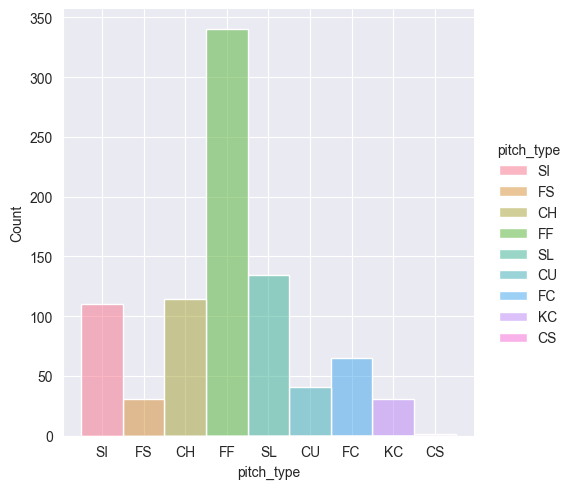

In [9]:
# X_numeric.head()
sns.set_palette('BuPu_r')
sns.displot(X_numeric, x='pitch_type', hue='pitch_type')
plt.show()

In [14]:
import plotly.express as px

km.dropna(subset='release_spin_rate', inplace=True)
fig = px.treemap(km,
                 path=['pitch_type', 'p_throws', 'type'],
                 color='release_spin_rate')
fig.show()